<a href="https://colab.research.google.com/github/harshad-leo/CE888/blob/main/CE888project/CE888_assign_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libaries
import pandas as pd
import numpy as np
import glob as glb
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading csv files
path = r'C:\Users\harsh\Downloads\uk_police_data'
all_files = glb.glob(path + "\*-stop-and-search.csv")

li = []

for filename in all_files:

    df = pd.read_csv(filename)
    df['Place']=filename
    li.append(df)
#   concatenate data  
data = pd.concat(li, axis=0)

data.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Place
0,Person search,2019-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Users\harsh\Downloads\uk_police_data\2019-0...
1,Person search,2019-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Users\harsh\Downloads\uk_police_data\2019-0...
2,Person search,2019-01-01T00:30:00+00:00,NaN,NaN,51.350977,-2.979701,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,C:\Users\harsh\Downloads\uk_police_data\2019-0...
3,Person search,2019-01-01T01:35:00+00:00,NaN,NaN,51.471129,-2.589816,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False,C:\Users\harsh\Downloads\uk_police_data\2019-0...
4,Person search,2019-01-01T01:35:00+00:00,NaN,NaN,51.471129,-2.589816,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False,C:\Users\harsh\Downloads\uk_police_data\2019-0...


In [ ]:
data.shape

(1285900, 16)

In [ ]:
data=data.rename(columns={'Type':'n_type'})

In [ ]:
# Renaming column names
data['n_place']= data['Place'].str.split('\\').str[1]
data['n_place'] = data['n_place'].str[8:]
data['n_place']= data['n_place'].str.split('-stop-and-search.csv').str[0]

data['n_place']= data['n_place'].str.replace('-',' ')
#data['n_place']=data['n_place'].str.title()

# checking
data.head()

,n_type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Place,n_place
0,Person search,2019-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Users\harsh\Downloads\uk_police_data\2019-0...,
1,Person search,2019-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Users\harsh\Downloads\uk_police_data\2019-0...,
2,Person search,2019-01-01T00:30:00+00:00,NaN,NaN,51.350977,-2.979701,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,C:\Users\harsh\Downloads\uk_police_data\2019-0...,
3,Person search,2019-01-01T01:35:00+00:00,NaN,NaN,51.471129,-2.589816,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False,C:\Users\harsh\Downloads\uk_police_data\2019-0...,
4,Person search,2019-01-01T01:35:00+00:00,NaN,NaN,51.471129,-2.589816,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False,C:\Users\harsh\Downloads\uk_police_data\2019-0...,


In [ ]:
# Date sub-string
data['n_month']=data['Date'].str[0:7]

data['n_date'] = data['Date']

In [ ]:
# Exploring Data
data['Part of a policing operation'].value_counts(dropna=False)
data['n_part_of_policing_operation']=np.where(data['Part of a policing operation']==True,'Part Of Policing Op','Unknown')
data['n_part_of_policing_operation']=np.where(data['Part of a policing operation']==False,'Not Part Of Policing Op',data['n_part_of_policing_operation'])
data['n_part_of_policing_operation'].value_counts(dropna=False)

Not Part Of Policing Op    875131
Unknown                    379642
Part Of Policing Op         31127
Name: n_part_of_policing_operation, dtype: int64

In [ ]:
data['Outcome linked to object of search'].value_counts(dropna=False)
data['n_outcome_lnkd_to_obj_of_search']=np.where(data['Outcome linked to object of search']==True,'Obj Of Search Was Found','Unknown')
data['n_outcome_lnkd_to_obj_of_search']=np.where(data['Outcome linked to object of search']==False,'Obj Of Search Was Not Found',data['n_outcome_lnkd_to_obj_of_search'])
data['n_outcome_lnkd_to_obj_of_search'].value_counts(dropna=False)

Unknown                        918205
Obj Of Search Was Not Found    210358
Obj Of Search Was Found        157337
Name: n_outcome_lnkd_to_obj_of_search, dtype: int64

In [ ]:
data['Gender'].value_counts(dropna=False)
data['n_gender']=np.where(data['Gender'].isna(),'Unknown',data['Gender'])
data['n_gender'].value_counts(dropna=False)

Male       1086709
Female      106854
Unknown      90115
Other         2222
Name: n_gender, dtype: int64

In [ ]:
data['Age range'].value_counts(dropna=False)
data['n_age']=np.where(data['Age range'].isna(),'Unknown',data['Age range'])
data['n_age']=np.where(data['Age range']=='over 34','Over 34',data['n_age'])
data['n_age']=np.where(data['Age range']=='under 10','Under 10',data['n_age'])
data['n_age'].value_counts(dropna=False)

18-24       416180
25-34       274568
Over 34     226727
10-17       218391
Unknown     149423
Under 10       611
Name: n_age, dtype: int64

In [ ]:
data['Self-defined ethnicity'].value_counts(dropna=False)

White - English/Welsh/Scottish/Northern Irish/British                                   516381
Other ethnic group - Not stated                                                         208180
White - Any other White background                                                      100413
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background     88436
Black/African/Caribbean/Black British - African                                          66866
Asian/Asian British - Any other Asian background                                         56261
NaN                                                                                      52507
Black/African/Caribbean/Black British - Caribbean                                        45149
Asian/Asian British - Pakistani                                                          38122
Asian/Asian British - Bangladeshi                                                        25652
Other ethnic group - Any other ethnic group       

In [ ]:
# Pre-processing (ethnicity classification)
data['n_self_def_eth']=np.where(data['Self-defined ethnicity'].isin(['White - English/Welsh/Scottish/Northern Irish/British',
                                                                     'White - Any other White background',
                                                                     'White - Gypsy or Irish Traveller',
                                                                     'White - Irish']),'White','Unknown')
data['n_self_def_eth']=np.where(data['Self-defined ethnicity'].isin(['Black/African/Caribbean/Black British - Any other Black/African/Caribbean background',
                                                                     'Black/African/Caribbean/Black British - African',
                                                                     'Black/African/Caribbean/Black British - Caribbean'
                                                                     ]),'BAME',data['n_self_def_eth'])
data['n_self_def_eth']=np.where(data['Self-defined ethnicity'].isin(['Asian/Asian British - Any other Asian background',
                                                                     'Asian/Asian British - Pakistani',
                                                                     'Asian/Asian British - Bangladeshi',
                                                                     'Asian/Asian British - Indian',
                                                                     'Asian/Asian British - Chinese']),'BAME',data['n_self_def_eth'])
data['n_self_def_eth']=np.where(data['Self-defined ethnicity'].isin(['Other ethnic group - Not stated',
                                                                     'Other ethnic group - Any other ethnic group',
                                                                     'Other ethnic group - Arab']),'BAME',data['n_self_def_eth'])
data['n_self_def_eth']=np.where(data['Self-defined ethnicity'].isin(['Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background',
                                                                     'Mixed/Multiple ethnic groups - White and Black Caribbean',
                                                                     'Mixed/Multiple ethnic groups - White and Black African',
                                                                     'Mixed/Multiple ethnic groups - White and Asian']),'BAME',data['n_self_def_eth'])

In [ ]:
data['n_self_def_eth'].value_counts()

White      627366
BAME       606027
Unknown     52507
Name: n_self_def_eth, dtype: int64

In [ ]:
data['Officer-defined ethnicity'].value_counts(dropna=False)
data['n_off_def_eth']=np.where(data['Officer-defined ethnicity'].isna(),'Unknown',data['Officer-defined ethnicity'])
data['n_off_def_eth'].value_counts(dropna=False)

White      689763
Black      283593
Asian      168971
Unknown    100133
Other       39658
Mixed        3782
Name: n_off_def_eth, dtype: int64

In [ ]:
data['Object of search'].value_counts(dropna=False)
data['n_obj_of_search']=np.where(data['Object of search'].isna(),'Unknown',data['Object of search'])
data['n_obj_of_search'].value_counts(dropna=False)

Controlled drugs                                  753271
Offensive weapons                                 172965
Stolen goods                                      110616
Unknown                                            83300
Article for use in theft                           59058
Evidence of offences under the Act                 32732
Anything to threaten or harm anyone                29677
Articles for use in criminal damage                20588
Firearms                                            9309
Psychoactive substances                             6770
Fireworks                                           6729
Game or poaching equipment                           351
Detailed object of search unavailable                310
Goods on which duty has not been paid etc.           105
Evidence of wildlife offences                         57
Crossbows                                             48
Evidence of hunting any wild mammal with a dog        10
Seals or hunting equipment     

In [ ]:
data['Outcome'].value_counts()
data=data.rename(columns={'Outcome':'n_outcome'})
data['n_outcome'].value_counts()

A no further action disposal       950805
Arrest                             154513
Community resolution                79161
Khat or Cannabis warning            24493
Summons / charged by post           22751
Penalty Notice for Disorder         21011
Caution (simple or conditional)      5080
Name: n_outcome, dtype: int64

In [ ]:
data['Removal of more than just outer clothing'].value_counts(dropna=False)
data['n_rem_more_than_out_cloth']=np.where(data['Removal of more than just outer clothing']==True,'Removed More Than Outer Clothing','Unknown')
data['n_rem_more_than_out_cloth']=np.where(data['Removal of more than just outer clothing']==False,'Not Removal Of More Than Outer Clothing',data['n_rem_more_than_out_cloth'])
data['n_rem_more_than_out_cloth'].value_counts(dropna=False)

Unknown                                    775584
Not Removal Of More Than Outer Clothing    490694
Removed More Than Outer Clothing            19622
Name: n_rem_more_than_out_cloth, dtype: int64

In [ ]:
# Renaming Columns
data=data.rename(columns={'Latitude':'n_latitude','Longitude':'n_longitude'})
data['n_month']=pd.to_datetime(data['n_month'],format="%Y-%m")
data['n_month']=data['n_month'].dt.strftime("%Y-%m")

In [ ]:
data=data.filter(regex='n_',axis=1)
data.head()

,n_type,n_latitude,n_longitude,n_outcome,n_place,n_month,n_date,n_part_of_policing_operation,n_outcome_lnkd_to_obj_of_search,n_gender,n_age,n_self_def_eth,n_off_def_eth,n_obj_of_search,n_rem_more_than_out_cloth
0,Person search,NaN,NaN,NaN,,2019-01,2019-01-01T00:00:00+00:00,Unknown,Unknown,Male,18-24,Unknown,Unknown,Unknown,Unknown
1,Person search,NaN,NaN,NaN,,2019-01,2019-01-01T00:00:00+00:00,Unknown,Unknown,Male,10-17,Unknown,Unknown,Unknown,Unknown
2,Person search,51.350977,-2.979701,Arrest,,2019-01,2019-01-01T00:30:00+00:00,Unknown,Obj Of Search Was Found,Male,Over 34,White,White,Controlled drugs,Not Removal Of More Than Outer Clothing
3,Person search,51.471129,-2.589816,NaN,,2019-01,2019-01-01T01:35:00+00:00,Unknown,Unknown,Male,Over 34,White,White,Article for use in theft,Not Removal Of More Than Outer Clothing
4,Person search,51.471129,-2.589816,NaN,,2019-01,2019-01-01T01:35:00+00:00,Unknown,Unknown,Male,Over 34,White,White,Article for use in theft,Not Removal Of More Than Outer Clothing


In [ ]:
data.to_csv(r'C:\Users\harsh\Downloads\uk_police_data.csv',index = False)

In [ ]:
data.n_outcome.value_counts()

A no further action disposal       950805
Arrest                             154513
Community resolution                79161
Khat or Cannabis warning            24493
Summons / charged by post           22751
Penalty Notice for Disorder         21011
Caution (simple or conditional)      5080
Name: n_outcome, dtype: int64

In [ ]:
# Group by on  data-set
r0=data.groupby(['n_month','n_self_def_eth'])['n_type'].count().reset_index()
r01=data.groupby(['n_month'])['n_type'].count().reset_index()

r01=r01.rename(columns={'n_type':'n_type_tot'})
r0=r0.merge(r01,on='n_month',how='left')
r0['n_type']=round(r0['n_type']/r0['n_type_tot'],4)
r0=r0.drop(['n_type_tot'],axis=1)
r0B=r0.loc[r0.n_self_def_eth=='BAME']
r0B=r0B.rename(columns={'n_type':'%BAME'})

r0W=r0.loc[r0.n_self_def_eth=='White']
r0W=r0W.rename(columns={'n_type':'%White'})

r0W.head()

,n_month,n_self_def_eth,%White
2,2019-01,White,0.5027
5,2019-02,White,0.4841
8,2019-03,White,0.4655
11,2019-04,White,0.4817
14,2019-05,White,0.4870


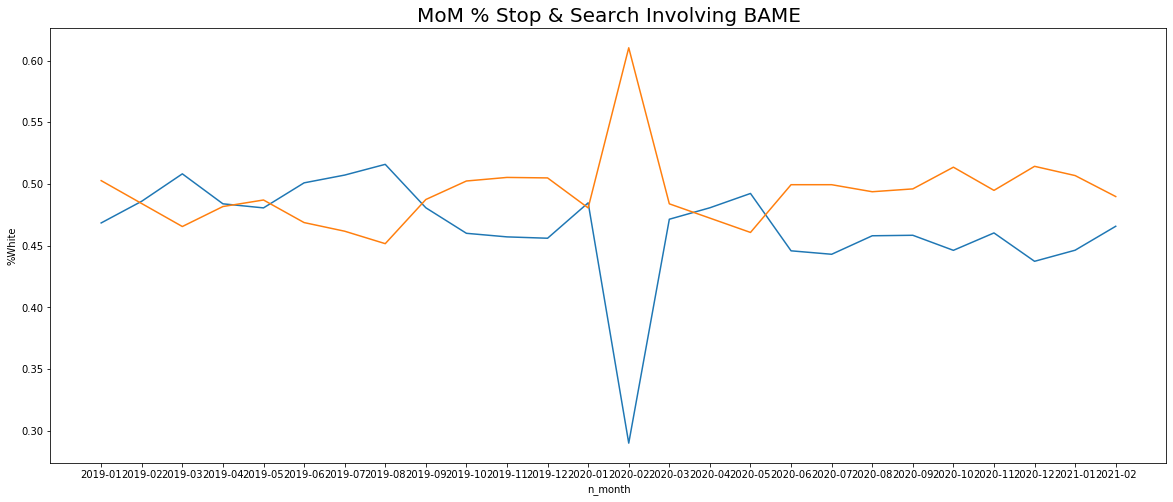

In [ ]:
# Plotting line graph
plt.figure(figsize=(20,8))
plt.title("MoM % Stop & Search Involving BAME", fontsize = 20)
g=sns.lineplot(x = r0B['n_month'], y = r0B['%BAME'], data=r0B,markers=True)
h=sns.lineplot(x = r0W['n_month'], y = r0W['%White'], data=r0W,markers=True)

In [ ]:
a=data.groupby(['n_self_def_eth','n_part_of_policing_operation'])['n_type'].count().reset_index()
a1=data.groupby(['n_self_def_eth'])['n_type'].count().reset_index()
a1=a1.rename(columns={'n_type':'n_type_tot'})
a=a.merge(a1,on=['n_self_def_eth'],how='left')
a['%perc_s&s']=round(a['n_type']/a['n_type_tot'],4)
a=a.drop(['n_type','n_type_tot'],axis=1)
a

,n_self_def_eth,n_part_of_policing_operation,%perc_s&s
0,BAME,Not Part Of Policing Op,0.8087
1,BAME,Part Of Policing Op,0.0175
2,BAME,Unknown,0.1738
3,Unknown,Not Part Of Policing Op,0.4854
4,Unknown,Part Of Policing Op,0.0190
5,Unknown,Unknown,0.4956
6,White,Not Part Of Policing Op,0.5731
7,White,Part Of Policing Op,0.0311
8,White,Unknown,0.3957


In [ ]:

data=pd.read_csv(r'C:\Users\harsh\Downloads\uk_police_data.csv')
data=data.loc[(data.n_self_def_eth!='unknown') & 
              (data.n_month<='2021-02') & 
              (data.n_gender.isin(['Male','Female'])) &
              (data.n_age!='Unknown') &
              (data.n_outcome.isin(['A no further action disposal','Arrest']))
             ]

data.n_self_def_eth.value_counts()

White      475935
BAME       438252
Unknown     16546
Name: n_self_def_eth, dtype: int64

In [ ]:
data.groupby(['n_month','n_self_def_eth'])['n_type'].count().reset_index().to_clipboard(index=False)

In [ ]:
data['dep_was_arrested_flag']=np.where(data['n_outcome']=='Arrest',1,0)
data.dep_was_arrested_flag.value_counts(dropna=False)
data=data.drop(['n_outcome','n_latitude','n_longitude'],axis=1)
data.head()

,n_type,n_place,n_month,n_date,n_part_of_policing_operation,n_outcome_lnkd_to_obj_of_search,n_gender,n_age,n_self_def_eth,n_off_def_eth,n_obj_of_search,n_rem_more_than_out_cloth,dep_was_arrested_flag
2,Person search,NaN,2019-01,2019-01-01T00:30:00+00:00,Unknown,Obj Of Search Was Found,Male,Over 34,White,White,Controlled drugs,Not Removal Of More Than Outer Clothing,1
5,Person search,NaN,2019-01,2019-01-01T01:45:00+00:00,Unknown,Unknown,Male,18-24,White,White,Offensive weapons,Not Removal Of More Than Outer Clothing,0
6,Person search,NaN,2019-01,2019-01-01T02:05:00+00:00,Unknown,Unknown,Male,18-24,White,White,Offensive weapons,Not Removal Of More Than Outer Clothing,0
7,Person search,NaN,2019-01,2019-01-01T02:25:00+00:00,Unknown,Unknown,Male,25-34,BAME,Mixed,Offensive weapons,Not Removal Of More Than Outer Clothing,0
8,Person search,NaN,2019-01,2019-01-01T02:50:00+00:00,Unknown,Unknown,Male,18-24,Unknown,Black,Offensive weapons,Not Removal Of More Than Outer Clothing,0


In [ ]:
data['n_bame_flag']=np.where(data['n_self_def_eth']=='BAME',1,0)

In [ ]:
crime_df=data.drop(['n_self_def_eth','n_off_def_eth','n_rem_more_than_out_cloth','n_month'],axis=1)

In [ ]:
# Replace the categorical values with the numeric equivalents that we have above
categoricalFeatures = ['n_type', 'n_place',
                       'n_part_of_policing_operation', 'n_outcome_lnkd_to_obj_of_search',
                       'n_gender', 'n_age',
                       'n_obj_of_search']
# Iterate through the list of categorical features and one hot encode them.
for feature in categoricalFeatures:
    onehot = pd.get_dummies(crime_df[feature], prefix=feature)
    crime_df = crime_df.drop(feature, axis=1)
    crime_df = crime_df.join(onehot)
crime_df

,n_date,dep_was_arrested_flag,n_bame_flag,n_type_Person and Vehicle search,n_type_Person search,n_type_Vehicle search,n_part_of_policing_operation_Not Part Of Policing Op,n_part_of_policing_operation_Part Of Policing Op,n_part_of_policing_operation_Unknown,n_outcome_lnkd_to_obj_of_search_Obj Of Search Was Found,...,n_obj_of_search_Evidence of wildlife offences,n_obj_of_search_Firearms,n_obj_of_search_Fireworks,n_obj_of_search_Game or poaching equipment,n_obj_of_search_Goods on which duty has not been paid etc.,n_obj_of_search_Offensive weapons,n_obj_of_search_Psychoactive substances,n_obj_of_search_Seals or hunting equipment,n_obj_of_search_Stolen goods,n_obj_of_search_Unknown
2,2019-01-01T00:30:00+00:00,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,2019-01-01T01:45:00+00:00,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,2019-01-01T02:05:00+00:00,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,2019-01-01T02:25:00+00:00,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,2019-01-01T02:50:00+00:00,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285885,2021-02-28T21:10:00+00:00,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1285889,2021-02-28T23:12:00+00:00,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1285891,2021-02-28T23:15:00+00:00,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1285894,2021-02-28T23:20:00+00:00,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Assigning target variable
y = crime_df['dep_was_arrested_flag']

In [ ]:

from sklearn.model_selection import train_test_split
encoded_df = crime_df.copy()
# Assigning features
x = crime_df.drop(['dep_was_arrested_flag','n_date'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standarisation
scaler = StandardScaler()
data_std = scaler.fit_transform(x)
# We will follow an 80-20 split pattern for our training and test data, respectively
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [ ]:
actual_test = x_test.copy()
actual_test['dep_was_arrested_flag'] = y_test
actual_test.shape

(186147, 36)

In [ ]:
# Feature Engineering
bame_df = actual_test[actual_test['n_bame_flag'] == 1]
num_of_priviliged = bame_df.shape[0]
white_df = actual_test[actual_test['n_bame_flag'] == 0]
num_of_unpriviliged = white_df.shape[0]

In [ ]:
unpriviliged_outcomes = white_df[white_df['dep_was_arrested_flag'] == 1].shape[0]
unpriviliged_ratio = unpriviliged_outcomes/num_of_unpriviliged
unpriviliged_ratio

0.1468030482916781

In [ ]:
priviliged_outcomes = bame_df[bame_df['dep_was_arrested_flag'] == 1].shape[0]
priviliged_ratio = priviliged_outcomes/num_of_priviliged
priviliged_ratio

0.1448972602739726

In [ ]:
# Calculating disparate impact
disparate_impact = unpriviliged_ratio / priviliged_ratio
print("Disparate Impact, Ethnicity vs. Predicted Arrest Status: " + str(disparate_impact))

Disparate Impact, Ethnicity vs. Predicted Arrest Status: 1.0131526849721106


In [ ]:
from sklearn.linear_model import LogisticRegression
# Liblinear is a solver that is very fast for small datasets, like ours
model = LogisticRegression(solver='liblinear', class_weight='balanced')

In [ ]:
# Training the logistic regression model
model.fit(x_train, y_train.astype('int'))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#  prediction 
y_pred = pd.Series(model.predict(x_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()
# Predicts 4/5 correctly in this sample

,True,Prediction
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
print(classification_report(y_test.astype('int'), y_pred.astype('int')))


              precision    recall  f1-score   support

           0       0.91      0.75      0.82    158987
           1       0.27      0.56      0.37     27160

    accuracy                           0.72    186147
   macro avg       0.59      0.65      0.59    186147
weighted avg       0.82      0.72      0.75    186147



In [ ]:
#  add this array into x_test 
y_pred = model.predict(x_test)
x_test['dep_was_arrested_flag'] = y_pred
original_output = x_test
original_output

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,n_bame_flag,n_type_Person and Vehicle search,n_type_Person search,n_type_Vehicle search,n_part_of_policing_operation_Not Part Of Policing Op,n_part_of_policing_operation_Part Of Policing Op,n_part_of_policing_operation_Unknown,n_outcome_lnkd_to_obj_of_search_Obj Of Search Was Found,n_outcome_lnkd_to_obj_of_search_Obj Of Search Was Not Found,n_outcome_lnkd_to_obj_of_search_Unknown,...,n_obj_of_search_Firearms,n_obj_of_search_Fireworks,n_obj_of_search_Game or poaching equipment,n_obj_of_search_Goods on which duty has not been paid etc.,n_obj_of_search_Offensive weapons,n_obj_of_search_Psychoactive substances,n_obj_of_search_Seals or hunting equipment,n_obj_of_search_Stolen goods,n_obj_of_search_Unknown,dep_was_arrested_flag
265590,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
748888,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
941432,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1258782,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
415801,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987133,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1258327,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
901185,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
330414,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
bame_df = original_output[original_output['n_bame_flag'] == 1]
num_of_priviliged = bame_df.shape[0]
white_df = original_output[original_output['n_bame_flag'] == 0]
num_of_unpriviliged = white_df.shape[0]

In [ ]:
unpriviliged_outcomes = white_df[white_df['dep_was_arrested_flag'] == 1].shape[0]
unpriviliged_ratio = unpriviliged_outcomes/num_of_unpriviliged
unpriviliged_ratio

0.28860340751113683

In [ ]:
priviliged_outcomes = bame_df[bame_df['dep_was_arrested_flag'] == 1].shape[0]
priviliged_ratio = priviliged_outcomes/num_of_priviliged
priviliged_ratio

0.3102853881278539

In [ ]:
impact = unpriviliged_ratio / priviliged_ratio
print("Impact, Ethnicity vs. Predicted Arrest Status: " + str(impact))

Impact, Ethnicity vs. Predicted Arrest Status: 0.930122456788771
